In [1]:
library(ggplot2)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.0
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
df <- read.csv("/groups/dog/stage/victor/bamslam/csv/subsample/all_subsample.csv", header=TRUE)

In [3]:
colnames(df)
head(df)

[1] "qname"                "seqnames"             "strand"              
 [4] "qwidth"               "start"                "end"                 
 [7] "width"                "flag"                 "mapq"                
[10] "NM"                   "AS"                   "tp"                  
[13] "nbrM"                 "nbrI"                 "nbrD"                
[16] "nbrN"                 "nbrS"                 "nbrH"                
[19] "nbrP"                 "nbr."                 "nbrX"                
[22] "novel_known"          "seqlengths"           "mean_qscore_template"
[25] "transcript_biotype"   "alignedLength"        "readLength"          
[28] "alignedFraction"      "accuracy"             "coverage"            
[31] "nbrSecondary"         "above"                "sample"              
[34] "condition"            "cancer"

# Across cancer

# Read length across cancer

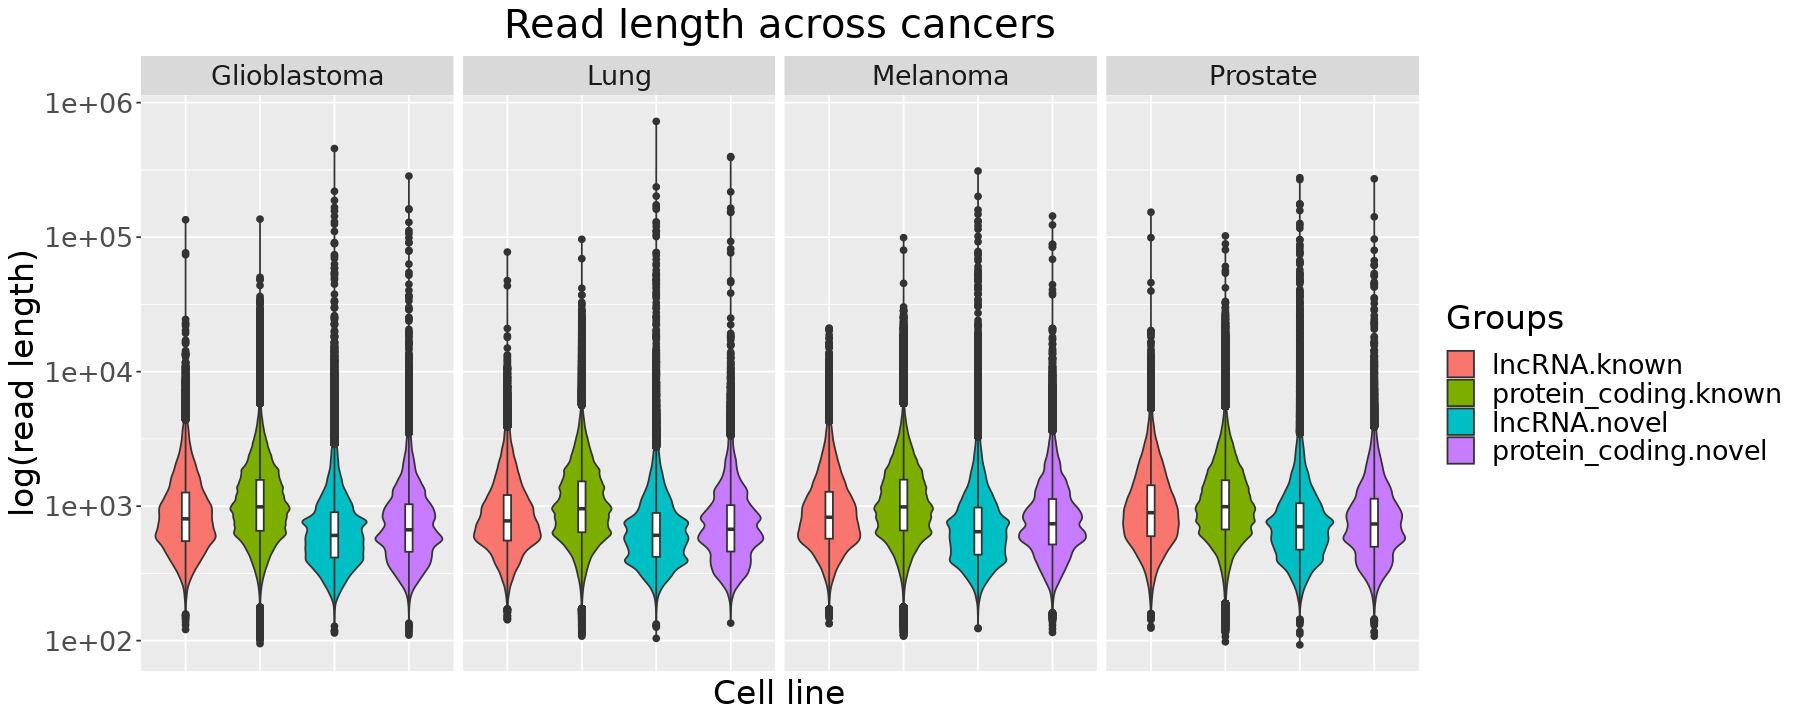

In [63]:
options(repr.plot.width=15, repr.plot.height=6)
# interaction allow to make combination of groups of all its parameters (i.e. mRNAs known, mRNAs novel, lncRNAs known, lncRNAs novel)
p <- ggplot(df, aes(x=interaction(transcript_biotype, novel_known), y=readLength, group=interaction(transcript_biotype, novel_known))) +
    geom_violin(aes(fill=interaction(transcript_biotype, novel_known))) +
    geom_boxplot(width=0.1) +
    scale_y_continuous(trans='log10') +
    theme(text=element_text(size=20),
        axis.ticks.x=element_blank(),
        axis.text.x=element_blank(), 
        plot.title=element_text(hjust=0.5)) + 
    ylab("log(read length)") +
    xlab("Cell line") +
    ggtitle("Read length across cancers") +
    labs(fill='Groups')

p + facet_grid(. ~ cancer)

# Qscore across cancer

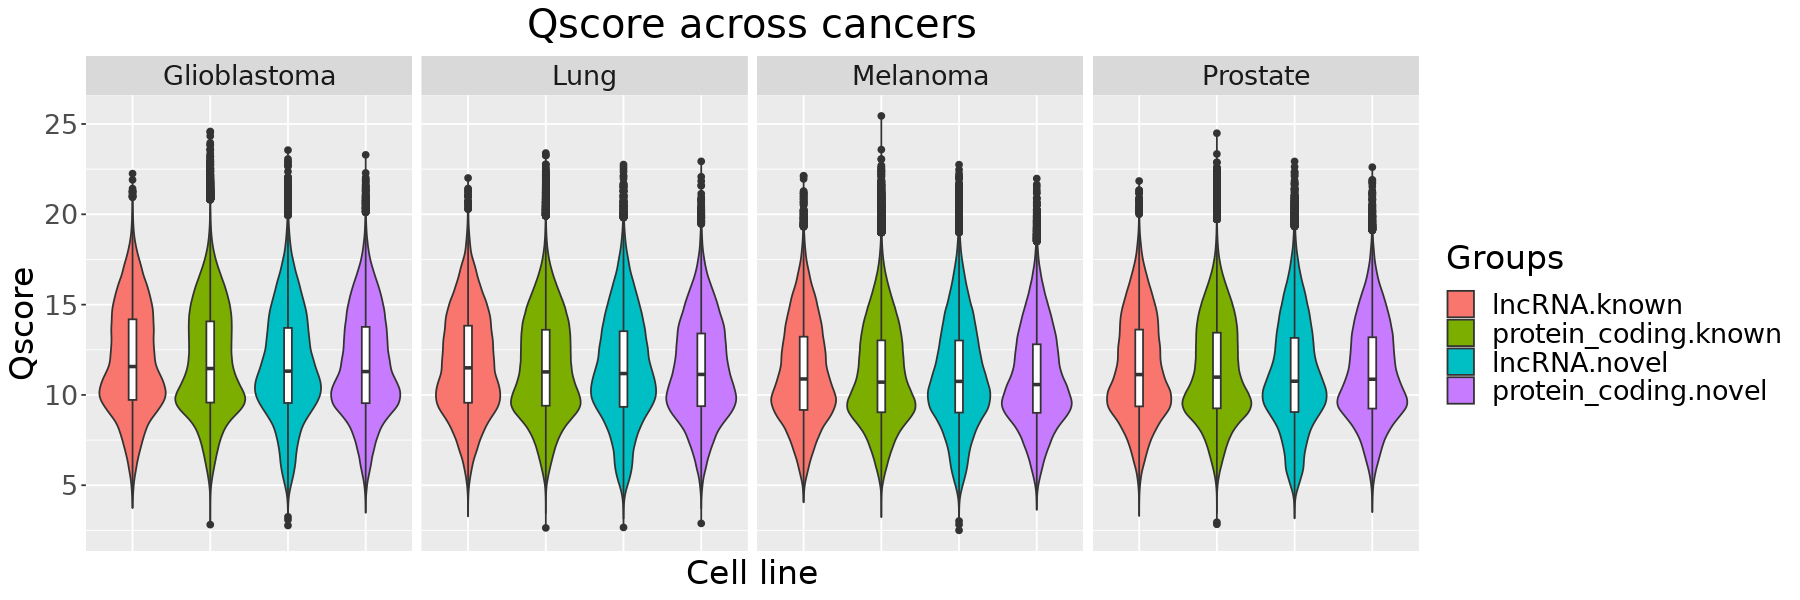

In [62]:
options(repr.plot.width=15, repr.plot.height=5)

p <- ggplot(df, aes(x=interaction(transcript_biotype, novel_known), y=mean_qscore_template, group=interaction(transcript_biotype, novel_known))) +
    geom_violin(aes(fill=interaction(transcript_biotype, novel_known))) +
    geom_boxplot(width=0.1) +
    theme(text=element_text(size=20),
        axis.ticks.x=element_blank(),
        axis.text.x=element_blank(), 
        plot.title=element_text(hjust=0.5)) + 
    ylab("Qscore") +
    xlab("Cell line") +
    ggtitle("Qscore across cancers") +
    labs(fill='Groups')

p + facet_grid(. ~ cancer)

# Coverage across cancer

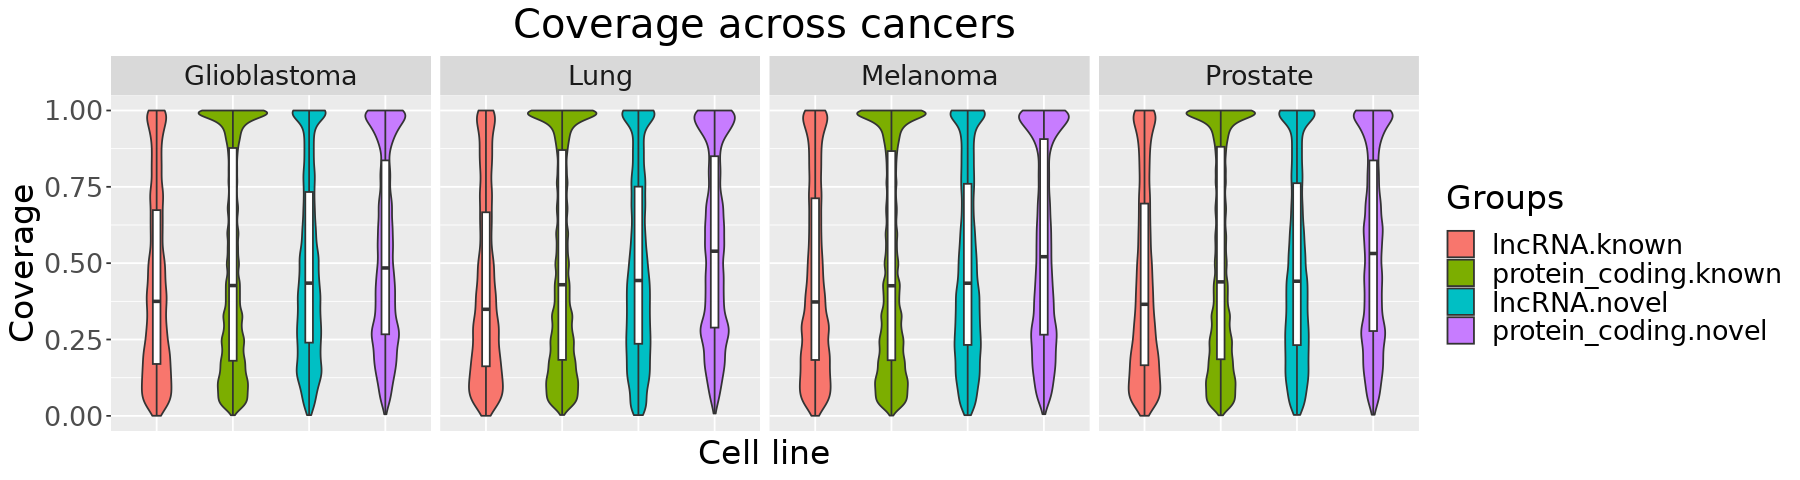

In [64]:
options(repr.plot.width=15, repr.plot.height=4)

p <- ggplot(df, aes(x=interaction(transcript_biotype, novel_known), y=coverage, group=interaction(transcript_biotype, novel_known))) +
    geom_violin(aes(fill=interaction(transcript_biotype, novel_known))) +
    geom_boxplot(width=0.1) +
    theme(text=element_text(size=20),
        axis.ticks.x=element_blank(),
        axis.text.x=element_blank(), 
        plot.title=element_text(hjust=0.5)) + 
    ylab("Coverage") +
    xlab("Cell line") +
    ggtitle("Coverage across cancers") +
    labs(fill='Groups')

p + facet_grid(. ~ cancer)

# Accuracy across cancer

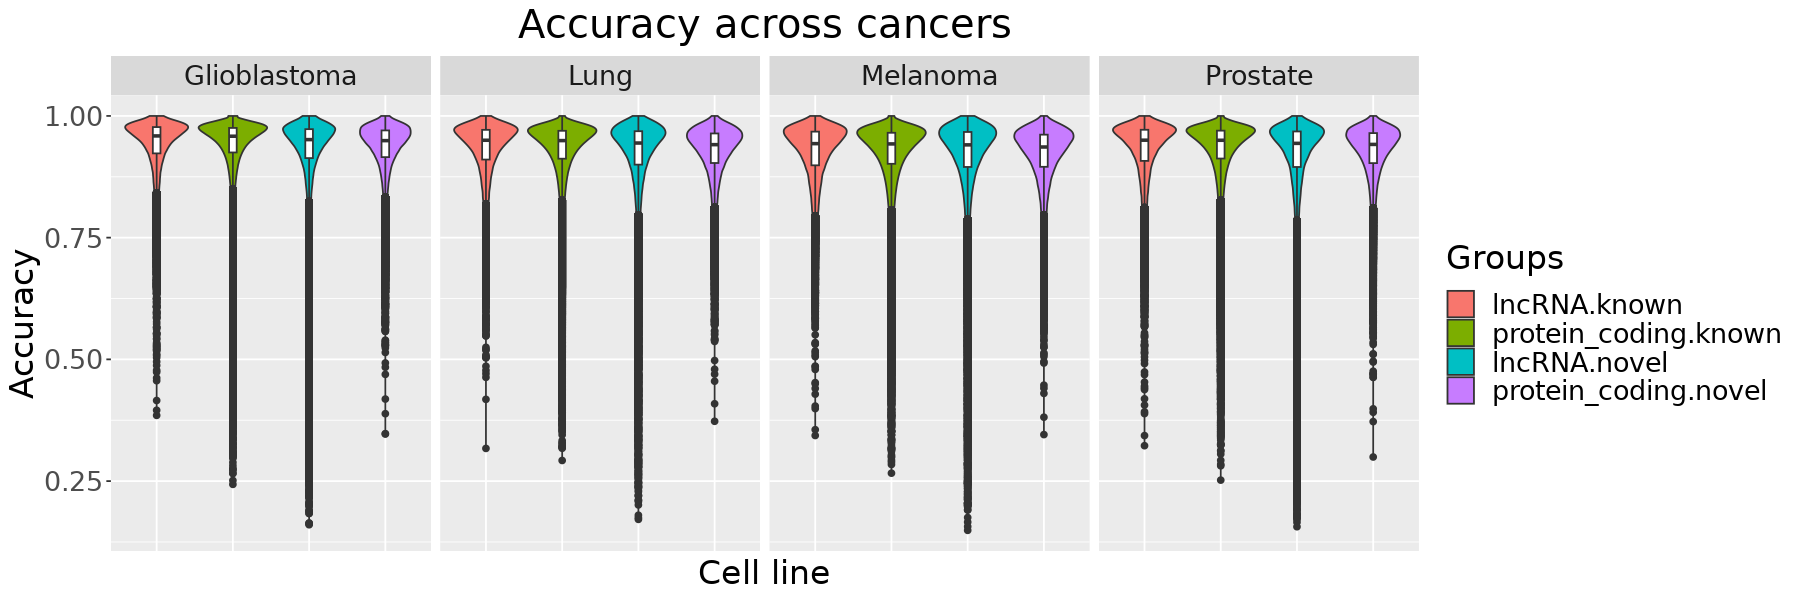

In [3]:
options(repr.plot.width=15, repr.plot.height=5)

p <- ggplot(df, aes(x=interaction(transcript_biotype, novel_known), y=accuracy, group=interaction(transcript_biotype, novel_known))) +
    geom_violin(aes(fill=interaction(transcript_biotype, novel_known))) +
    geom_boxplot(width=0.1) +
    theme(text=element_text(size=20),
        axis.ticks.x=element_blank(),
        axis.text.x=element_blank(), 
        plot.title=element_text(hjust=0.5)) + 
    ylab("Accuracy") +
    xlab("Cell line") +
    ggtitle("Accuracy across cancers") +
    labs(fill='Groups')

p + facet_grid(. ~ cancer)

# Sensitive vs Resistant for one cancer

# Read length

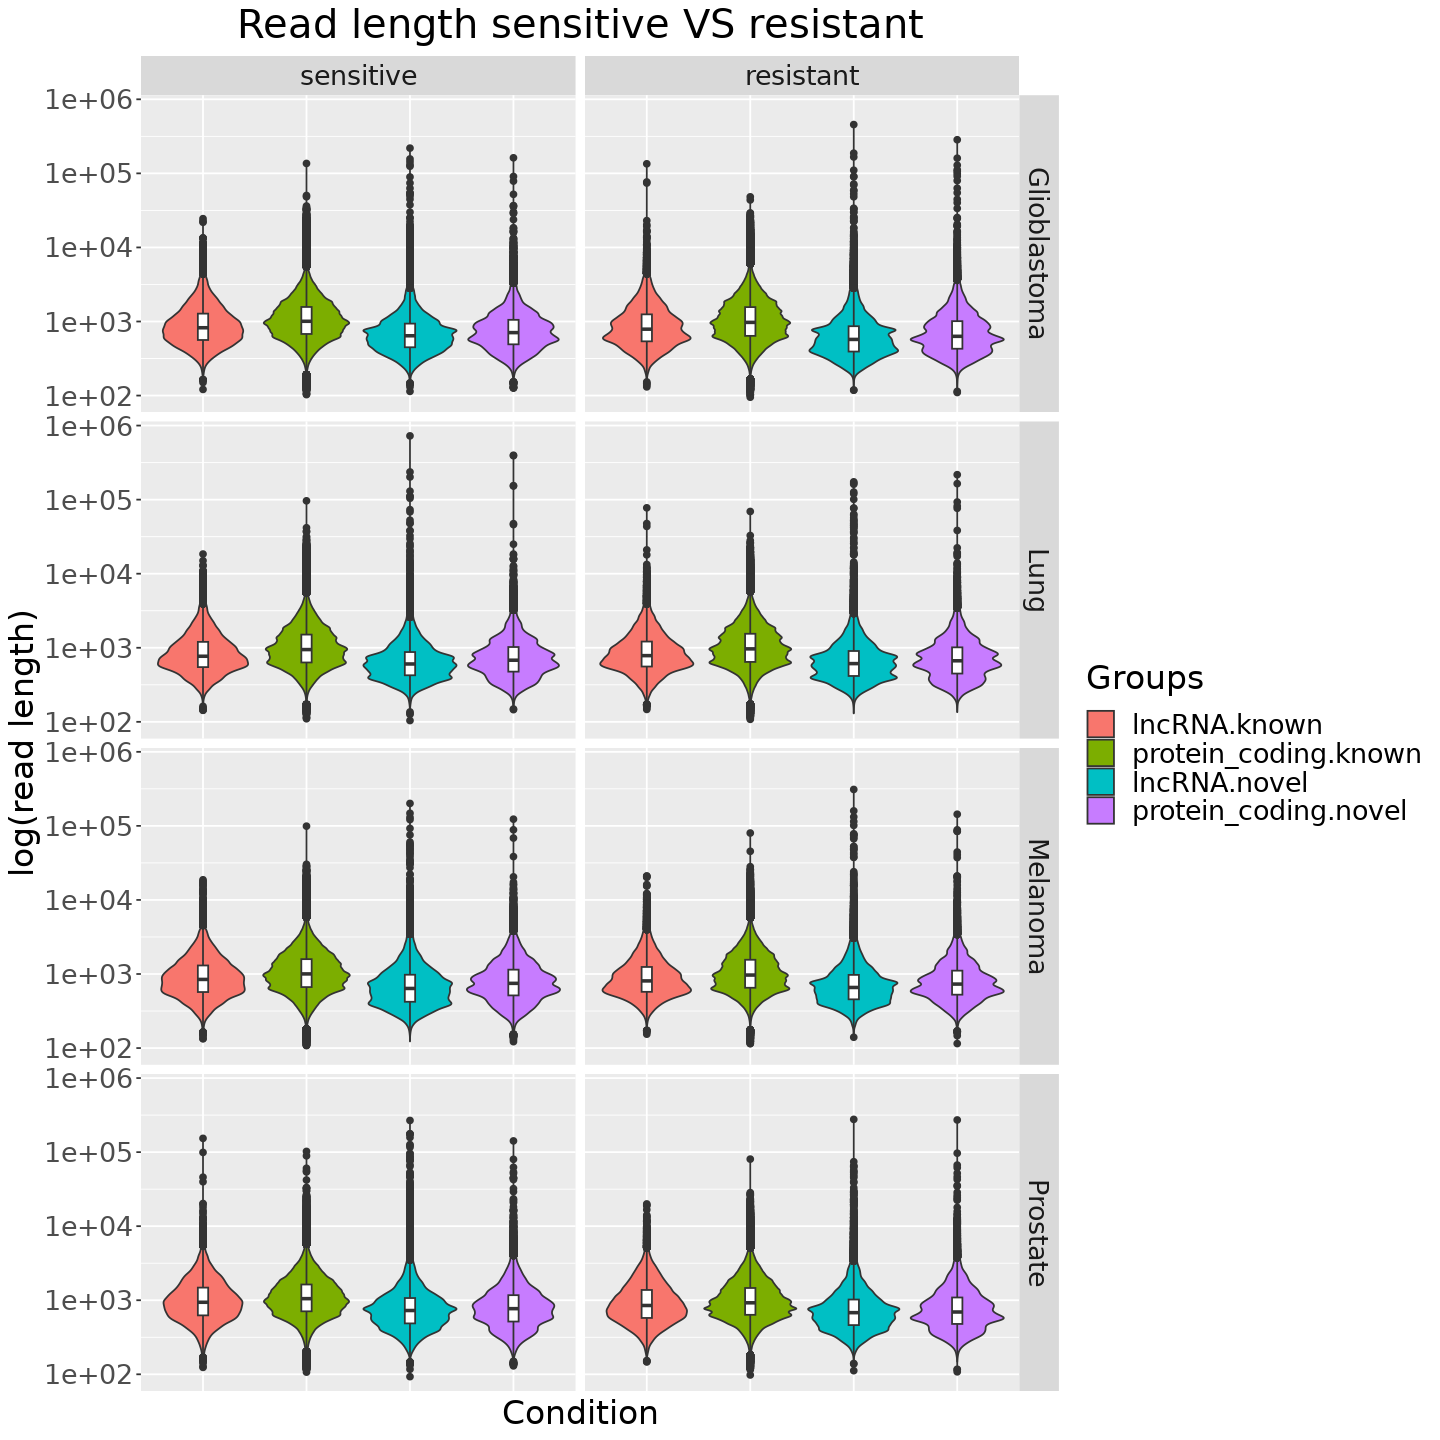

In [14]:
options(repr.plot.width=12, repr.plot.height=12)

p <- ggplot(df, aes(x=interaction(transcript_biotype, novel_known), y=readLength, group=interaction(transcript_biotype, novel_known))) +
    geom_violin(aes(fill=interaction(transcript_biotype, novel_known))) +
    geom_boxplot(width=0.1) +
    scale_y_continuous(trans='log10') +
    theme(text=element_text(size=20),
        axis.ticks.x=element_blank(),
        axis.text.x=element_blank(), 
        plot.title=element_text(hjust=0.5)) + 
    ylab("log(read length)") +
    xlab("Condition") +
    ggtitle("Read length sensitive VS resistant") +
    labs(fill='Groups')

p + facet_grid(cancer ~ fct_rev(condition))

# Qscore

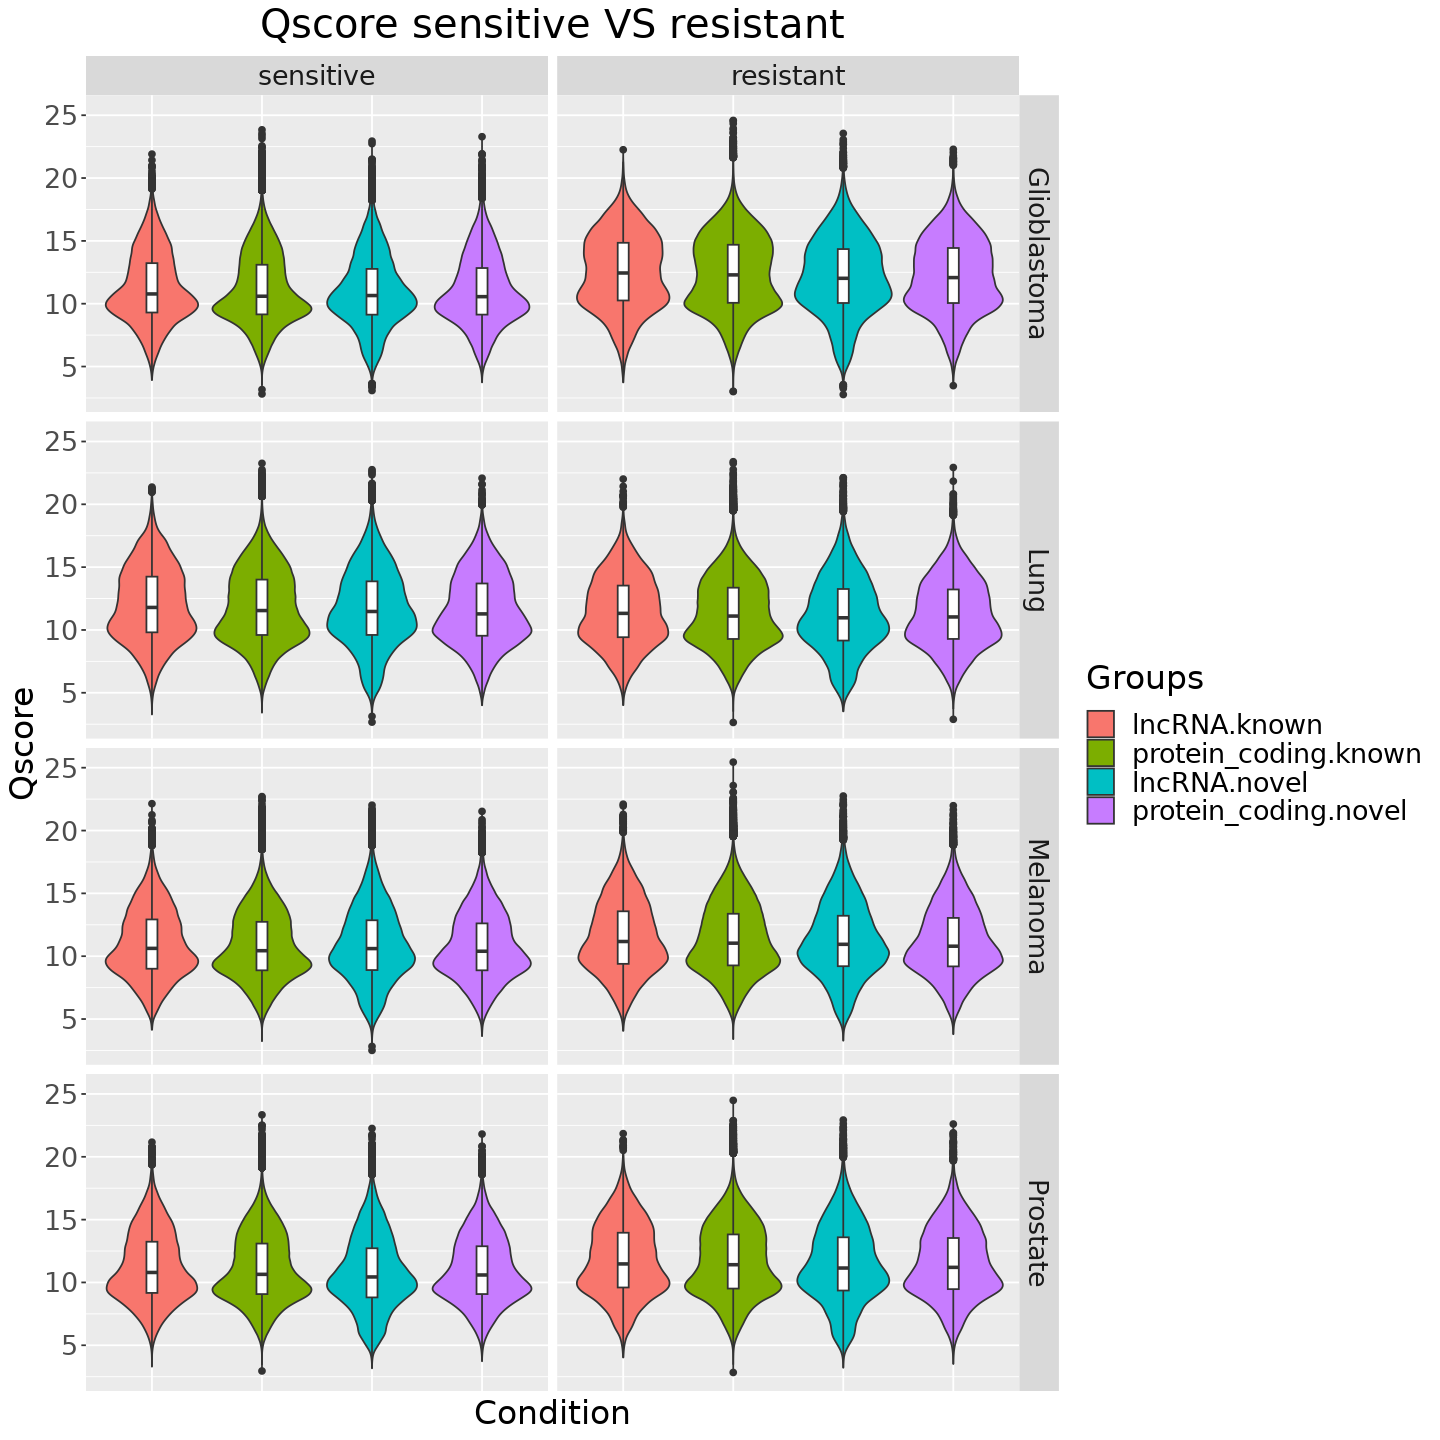

In [15]:
options(repr.plot.width=12, repr.plot.height=12)

p <- ggplot(df, aes(x=interaction(transcript_biotype, novel_known), y=mean_qscore_template, group=interaction(transcript_biotype, novel_known))) +
    geom_violin(aes(fill=interaction(transcript_biotype, novel_known))) +
    geom_boxplot(width=0.1) +
    theme(text=element_text(size=20),
        axis.ticks.x=element_blank(),
        axis.text.x=element_blank(), 
        plot.title=element_text(hjust=0.5)) + 
    ylab("Qscore") +
    xlab("Condition") +
    ggtitle("Qscore sensitive VS resistant") +
    labs(fill='Groups')

p + facet_grid(cancer ~ fct_rev(condition))

# Coverage

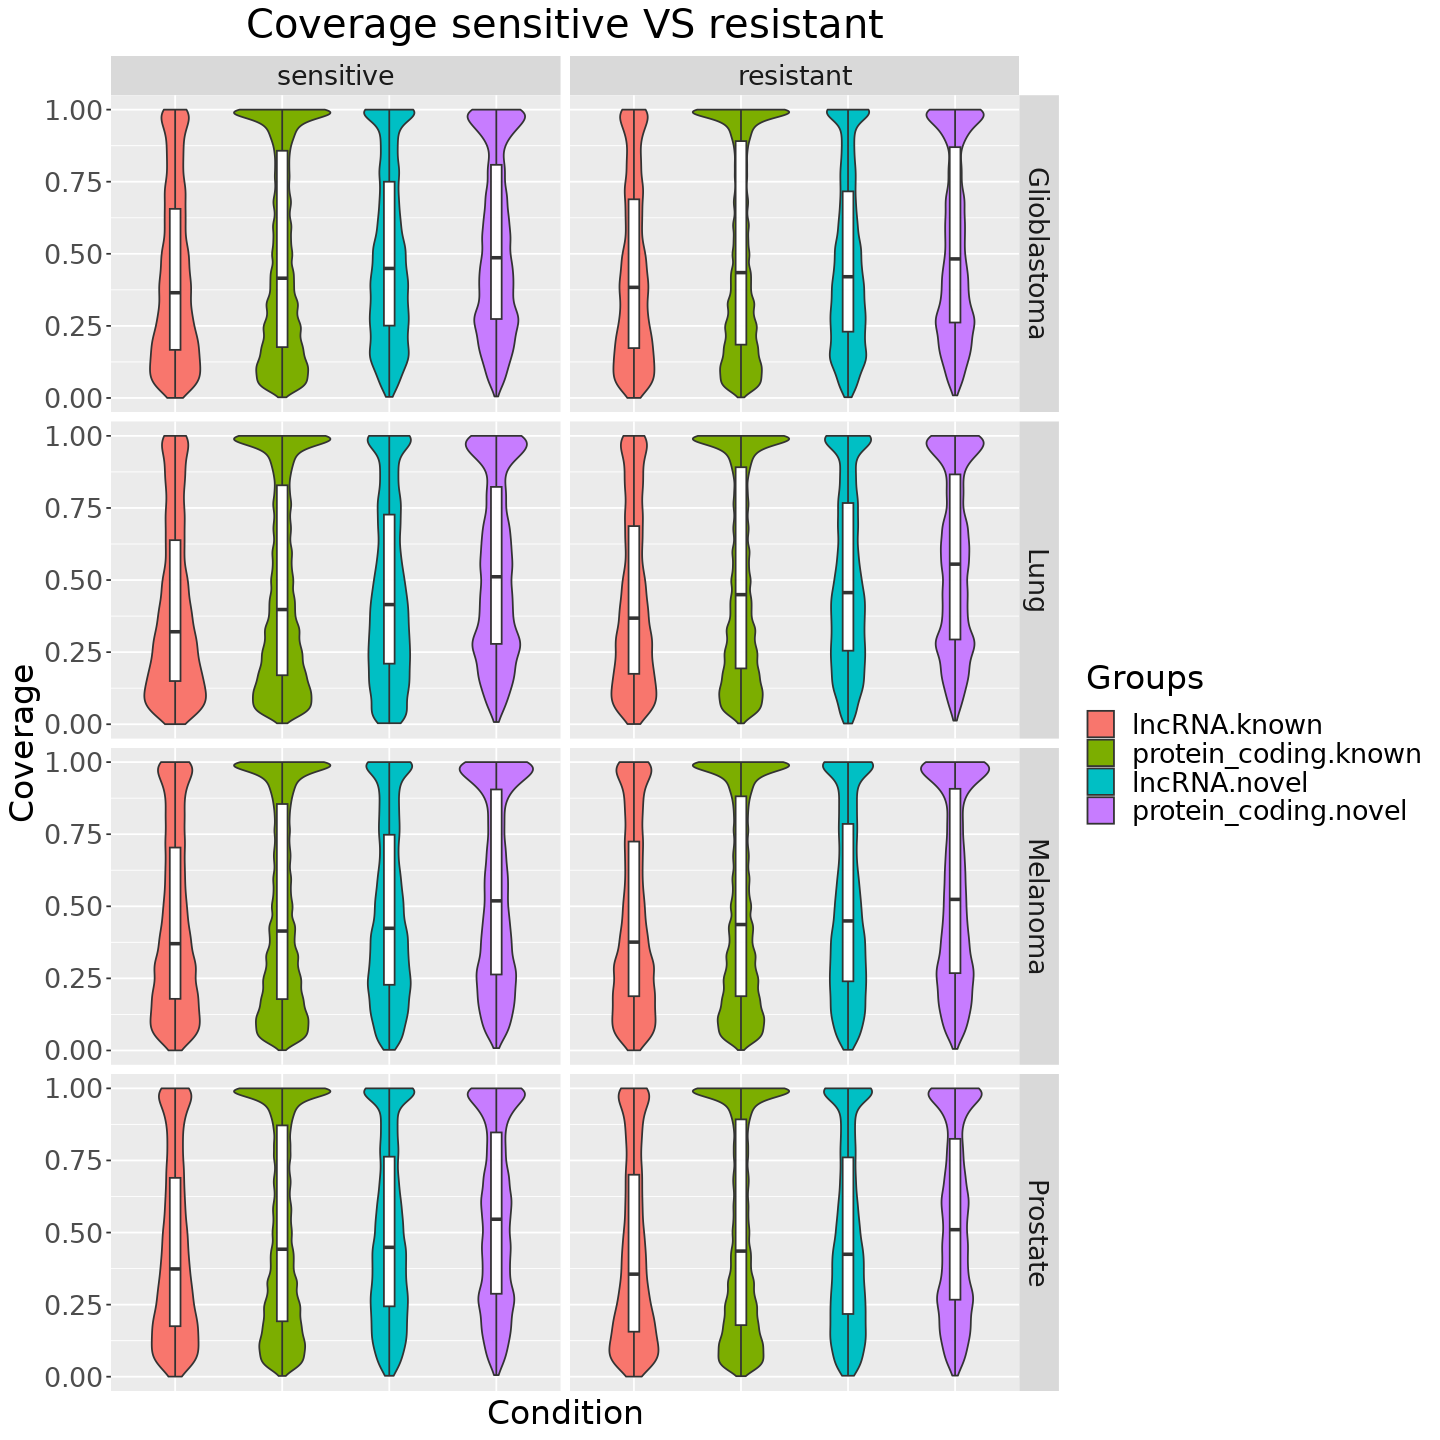

In [58]:
options(repr.plot.width=12, repr.plot.height=12)

p <- ggplot(df, aes(x=interaction(transcript_biotype, novel_known), y=coverage, group=interaction(transcript_biotype, novel_known))) +
    geom_violin(aes(fill=interaction(transcript_biotype, novel_known))) +
    geom_boxplot(width=0.1) +
    theme(text=element_text(size=20),
        axis.ticks.x=element_blank(),
        axis.text.x=element_blank(), 
        plot.title=element_text(hjust=0.5)) + 
    ylab("Coverage") +
    xlab("Condition") +
    ggtitle("Coverage sensitive VS resistant") +
    labs(fill='Groups')

p + facet_grid(cancer ~ fct_rev(condition))